# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Arlynandhita Felisya Putri Wibowo
- **Email:** fellisyaputri@gmail.com
- **ID Dicoding:** Arlynandhita Felisya Putri Wibowo

## Menentukan Pertanyaan Bisnis

- What are the peak rental hours in period during weekdays and weekends?
- How does weather condition affect bike rental demand?
- What are the seasonal trends in bike rental demand?
- What is the correlation between weather conditions (temperature, humidity, and windspeed) and the count of rental bikes?

## Import Semua Packages/Library yang Digunakan

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\felli\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\felli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


## Data Wrangling

### Gathering Data

In [2]:
#import data day.csv
bikeDay = pd.read_csv('day.csv',index_col='dteday', parse_dates=['dteday'])
#import data hour.csv
bikeHour = pd.read_csv('hour.csv',index_col='dteday', parse_dates=['dteday'])

In [3]:
data = {'bikeDay': bikeDay,
       'bikeHour': bikeHour}

In [4]:
data['bikeDay'].head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
data['bikeHour'].head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Check Column using info()

In [6]:
for df_name,df in data.items():
    print('\n', data[df_name].info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 91.4 KB

 None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 to 2012-12-31
Data columns (total 16 colu

Check duplicate data

In [7]:
total_duplicate = {}

for df_name,df in data.items():
    total_duplicate[df_name] = df.duplicated().sum()
    print(df_name, '\n', total_duplicate[df_name], '\n')

bikeDay 
 0 

bikeHour 
 0 



Check null data

In [8]:
total_null = {}

for df_name,df in data.items():
    total_null[df_name] = df.isna().sum()
    print(df_name, '\n', total_null[df_name], '\n')

bikeDay 
 instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 

bikeHour 
 instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 



### Cleaning Data

### bikeDay Cleaning Data

Repairing bikeDay using Mapping

In [9]:
# Mapping
season_mapping = {1:'springer', 2:'summer', 
                  3:'fall', 4:'winter'}
bikeDay['season'] = bikeDay['season'].map(season_mapping)
#----------------------------------------------------------
year_mapping = {0: '2011', 1:'2012'}
bikeDay['yr'] = bikeDay['yr'].map(year_mapping)
#----------------------------------------------------------
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
                5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
                9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
bikeDay['mnth'] = bikeDay['mnth'].map(month_mapping)
#----------------------------------------------------------
week_mapping = {0:'Sun',1:'Mon',2:'Tue',
                3:'Wed',4:'Thu',5:'Fri',6:'Sat'}
bikeDay['weekday'] = bikeDay['weekday'].map(week_mapping)
#-----------------------------------------------------------
weather_mapping = {1: 'Clear', 2: 'Mist + Cloudy',
                   3: 'Light Snow', 4: 'Heavy Rain'}
bikeDay['weathersit'] = bikeDay['weathersit'].map(weather_mapping)
#-------------------------------------------------------------

data['bikeDay'].head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,springer,2011,Jan,0,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,springer,2011,Jan,0,Sun,0,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,springer,2011,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,springer,2011,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,springer,2011,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Repairing Data type

In [10]:
data['bikeDay'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   season      731 non-null    object 
 2   yr          731 non-null    object 
 3   mnth        731 non-null    object 
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    object 
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    object 
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 91.4+ KB


In [11]:
bikeDay['season'] = bikeDay['season'].astype('category')
bikeDay['yr'] = bikeDay['yr'].astype('category')
bikeDay['mnth'] = bikeDay['mnth'].astype('category')
bikeDay['weekday'] = bikeDay['weekday'].astype('category')
bikeDay['weathersit'] = bikeDay['weathersit'].astype('category')

In [12]:
data['bikeDay'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     731 non-null    int64   
 1   season      731 non-null    category
 2   yr          731 non-null    category
 3   mnth        731 non-null    category
 4   holiday     731 non-null    int64   
 5   weekday     731 non-null    category
 6   workingday  731 non-null    int64   
 7   weathersit  731 non-null    category
 8   temp        731 non-null    float64 
 9   atemp       731 non-null    float64 
 10  hum         731 non-null    float64 
 11  windspeed   731 non-null    float64 
 12  casual      731 non-null    int64   
 13  registered  731 non-null    int64   
 14  cnt         731 non-null    int64   
dtypes: category(5), float64(4), int64(6)
memory usage: 67.6 KB


Rename column bikeDay

In [13]:
bikeDay.rename(columns={'yr':'year','mnth':'month','cnt':'total'}, inplace=True)
bikeDay.head()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
dteday,,,,,,,,,,,,,,,
2011-01-01,1,springer,2011,Jan,0,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,springer,2011,Jan,0,Sun,0,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,springer,2011,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,springer,2011,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,springer,2011,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### bikeHour CleaningData

Drop data windspeed, because it doesn't need

In [14]:
bikeHour['bikeHour'] = data['bikeHour'].drop(['windspeed'], axis=1, inplace=True)

Repairing bikeDay using Mapping

In [15]:
season_mapping = {1:'springer', 2:'summer', 
                  3:'fall', 4:'winter'}
bikeHour['season'] = bikeHour['season'].map(season_mapping)
#----------------------------------------------------------
year_mapping = {0: '2011', 1:'2012'}
bikeHour['yr'] = bikeHour['yr'].map(year_mapping)
#----------------------------------------------------------
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
                5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
                9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
bikeHour['mnth'] = bikeHour['mnth'].map(month_mapping)
#----------------------------------------------------------
week_mapping = {0:'Sun',1:'Mon',2:'Tue',
                3:'Wed',4:'Thu',5:'Fri',6:'Sat'}
bikeHour['weekday'] = bikeHour['weekday'].map(week_mapping)
#-----------------------------------------------------------
weather_mapping = {1: 'Clear', 2: 'Mist + Cloudy',
                   3: 'Light Snow', 4: 'Heavy Rain'}
bikeHour['weathersit'] = bikeHour['weathersit'].map(weather_mapping)
#-------------------------------------------------------------

data['bikeHour'].head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt,bikeHour
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,springer,2011,Jan,0,0,Sat,0,Clear,0.24,0.2879,0.81,3,13,16,None
2011-01-01,2,springer,2011,Jan,1,0,Sat,0,Clear,0.22,0.2727,0.80,8,32,40,None
2011-01-01,3,springer,2011,Jan,2,0,Sat,0,Clear,0.22,0.2727,0.80,5,27,32,None
2011-01-01,4,springer,2011,Jan,3,0,Sat,0,Clear,0.24,0.2879,0.75,3,10,13,None
2011-01-01,5,springer,2011,Jan,4,0,Sat,0,Clear,0.24,0.2879,0.75,0,1,1,None


Repairing Data type

In [16]:
data['bikeHour'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 to 2012-12-31
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   season      17379 non-null  object 
 2   yr          17379 non-null  object 
 3   mnth        17379 non-null  object 
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  object 
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  object 
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
 15  bikeHour    0 non-null      object 
dtypes: float64(3), int64(7), object(6)
memory usage: 2.3+ MB


In [17]:
bikeHour['season'] = bikeHour['season'].astype('category')
bikeHour['yr'] = bikeHour['yr'].astype('category')
bikeHour['mnth'] = bikeHour['mnth'].astype('category')
bikeHour['weekday'] = bikeHour['weekday'].astype('category')
bikeHour['weathersit'] = bikeHour['weathersit'].astype('category')

In [18]:
data['bikeHour'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 to 2012-12-31
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   season      17379 non-null  category
 2   yr          17379 non-null  category
 3   mnth        17379 non-null  category
 4   hr          17379 non-null  int64   
 5   holiday     17379 non-null  int64   
 6   weekday     17379 non-null  category
 7   workingday  17379 non-null  int64   
 8   weathersit  17379 non-null  category
 9   temp        17379 non-null  float64 
 10  atemp       17379 non-null  float64 
 11  hum         17379 non-null  float64 
 12  casual      17379 non-null  int64   
 13  registered  17379 non-null  int64   
 14  cnt         17379 non-null  int64   
 15  bikeHour    0 non-null      object  
dtypes: category(5), float64(3), int64(7), object(1)
memory usage: 1.7+ MB


Bins hour

In [19]:
def period(hr):
    if (hr >= 5) and (hr <= 12):
        return 'Morning'
    elif (hr >= 13) and (hr <= 17):
        return 'Afternoon'
    elif (hr >= 18) and (hr <= 21):
        return 'Evening'
    else:
        return 'Night'

# Add new column 'period' based on 'hr' column
bikeHour['period'] = bikeHour['hr'].apply(period)

# Drop 'hr' and 'bikeHour' columns
bikeHour.drop(['hr', 'bikeHour'], axis=1, inplace=True)

In [20]:
bikeHour.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt,period
dteday,,,,,,,,,,,,,,,
2011-01-01,1,springer,2011,Jan,0,Sat,0,Clear,0.24,0.2879,0.81,3,13,16,Night
2011-01-01,2,springer,2011,Jan,0,Sat,0,Clear,0.22,0.2727,0.80,8,32,40,Night
2011-01-01,3,springer,2011,Jan,0,Sat,0,Clear,0.22,0.2727,0.80,5,27,32,Night
2011-01-01,4,springer,2011,Jan,0,Sat,0,Clear,0.24,0.2879,0.75,3,10,13,Night
2011-01-01,5,springer,2011,Jan,0,Sat,0,Clear,0.24,0.2879,0.75,0,1,1,Night


Rename column bikeHour

In [21]:
bikeHour.rename(columns={'yr':'year','mnth':'month','cnt':'total'}, inplace=True)
bikeDay.head()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
dteday,,,,,,,,,,,,,,,
2011-01-01,1,springer,2011,Jan,0,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,springer,2011,Jan,0,Sun,0,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,springer,2011,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,springer,2011,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,springer,2011,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore Rent Total each Month

In [22]:
totalRentMnth = data['bikeDay'].groupby(['year','month']).agg({
    'total':'sum'
})
totalRentMnth

C:\Users\felli\AppData\Local\Temp\ipykernel_10740\2830496551.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totalRentMnth = data['bikeDay'].groupby(['year','month']).agg({


total
year month        
2011 Apr     94870
     Aug    136691
     Dec     87323
     Feb     48215
     Jan     38189
     Jul    141341
     Jun    143512
     Mar     64045
     May    135821
     Nov    102167
     Oct    123511
     Sep    127418
2012 Apr    174224
     Aug    214503
     Dec    123713
     Feb    103137
     Jan     96744
     Jul    203607
     Jun    202830
     Mar    164875
     May    195865
     Nov    152664
     Oct    198841
     Sep    218573

In [23]:
# maximum and minimum rental months for 2011
max_rent_2011 = totalRentMnth.loc['2011', ('total')].idxmax()
min_rent_2011 = totalRentMnth.loc['2011', ('total')].idxmin()

# maximum and minimum rental months for 2012
max_rent_2012 = totalRentMnth.loc['2012', ('total')].idxmax()
min_rent_2012 = totalRentMnth.loc['2012', ('total')].idxmin()

print('2011:')
print('Maximum rental month:', max_rent_2011)
print('Minimum rental month:', min_rent_2011)

print('\n2012:')
print('Maximum rental month:', max_rent_2012)
print('Minimum rental month:', min_rent_2012)

2011:
Maximum rental month: Jun
Minimum rental month: Jan

2012:
Maximum rental month: Sep
Minimum rental month: Jan


In 2011, the month of June witnessed the highest bicycle rental count, while January recorded the lowest rental count. On the other hand, in 2012, September saw the peak in bicycle rentals, while January again had the lowest rental count. This analysis suggests a potential seasonal trend in bicycle rentals, with warmer months typically experiencing higher demand compared to colder months

### Explore Rent Total each Season

In [24]:
totalRentSsn = data['bikeDay'].groupby(['season']).agg({
    'total':['sum','mean','max','min']
})
totalRentSsn

C:\Users\felli\AppData\Local\Temp\ipykernel_10740\64601009.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totalRentSsn = data['bikeDay'].groupby(['season']).agg({


total                         
              sum         mean   max   min
season                                    
fall      1061129  5644.303191  8714  1115
springer   471348  2604.132597  7836   431
summer     918589  4992.331522  8362   795
winter     841613  4728.162921  8555    22

In [25]:
max_rentSsn = totalRentSsn['total']['sum'].idxmax()
min_rentSsn = totalRentSsn['total']['sum'].idxmin()
print('High bicycle rent is in:', max_rentSsn, '\n' "Low bicycle rent is in:", min_rentSsn)

High bicycle rent is in: fall 
Low bicycle rent is in: springer


From the results above, the highest bicycle rental occurred during the fall season, while the lowest rental was observed during the spring season.

### Explore Rent Total each Day

In [26]:
totalRentDay = data['bikeDay'].groupby(['weekday']).agg({
    'total':['sum','mean','max','min']
})
totalRentDay

C:\Users\felli\AppData\Local\Temp\ipykernel_10740\2507986765.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totalRentDay = data['bikeDay'].groupby(['weekday']).agg({


total                         
            sum         mean   max   min
weekday                                 
Fri      487790  4690.288462  8362  1167
Mon      455503  4338.123810  7525    22
Sat      477807  4550.542857  8714   627
Sun      444027  4228.828571  8227   605
Thu      485395  4667.259615  7804   431
Tue      469109  4510.663462  7767   683
Wed      473048  4548.538462  8173   441

In [27]:
max_rentDay = totalRentDay['total']['sum'].idxmax()
min_rentDay = totalRentDay['total']['sum'].idxmin()
print('High bicycle rent is in:', max_rentDay, '\n' "Low bicycle rent is in:", min_rentDay)

High bicycle rent is in: Fri 
Low bicycle rent is in: Sun


From the results above, it is known that the most bicycle rentals occurred in Thursday and the least occurred in Sunday

### Explore Rent Total each Weather

In [28]:
totalRentWeather = data['bikeDay'].groupby(['weathersit']).agg({
    'total':['sum','mean','max','min']
})
totalRentWeather

C:\Users\felli\AppData\Local\Temp\ipykernel_10740\2793082635.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totalRentWeather = data['bikeDay'].groupby(['weathersit']).agg({


total                        
                   sum         mean   max  min
weathersit                                    
Clear          2257952  4876.786177  8714  431
Light Snow       37869  1803.285714  4639   22
Mist + Cloudy   996858  4035.862348  8362  605

In [29]:
max_rentWeather = totalRentWeather['total']['sum'].idxmax()
min_rentWeather = totalRentWeather['total']['sum'].idxmin()
print('High bicycle rent is in:', max_rentWeather, '\n' "Low bicycle rent is in:", min_rentWeather)

High bicycle rent is in: Clear 
Low bicycle rent is in: Light Snow


From the results above, it is known that the most bicycle rentals occurred in Clear weather and the least occurred in Light snow weather

### Explore Rent Total each Period

#### in Weekday

In [30]:
print(bikeHour.columns)

Index(['instant', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'casual',
       'registered', 'total', 'period'],
      dtype='object')


In [31]:
weekdayFilter = bikeHour[bikeHour['weekday'].isin(["Mon", "Tue", "Wed", "Thu", "Fri"])]
totalRentWeekday = weekdayFilter.groupby(['period']).agg({
    'total':['sum','mean','max','min'],
})
totalRentWeekday.sort_values(('total','sum'),ascending=False)

total                     
              sum        mean  max min
period                                
Morning    834376  201.735010  839   1
Afternoon  728611  280.558722  976  11
Evening    652849  314.474470  977   6
Night      155009   43.590832  502   1

In [32]:
max_rentPeriodWeekday = totalRentWeekday['total']['sum'].idxmax()
min_rentPeriodWeekday = totalRentWeekday['total']['sum'].idxmin()
print('High bicycle rent is in:', max_rentPeriodWeekday, '\n' "Low bicycle rent is in:", min_rentPeriodWeekday)

High bicycle rent is in: Morning 
Low bicycle rent is in: Night


From the results above, it is known that the most bicycle rentals while Weekday occurred in Morning (5AM - 12PM) and the least occurred in Night (10AM - 4AM)

#### in Weekend

In [33]:
weekendFilter = bikeHour[bikeHour['weekday'].isin(["Sun","Sat"])]
totalRentWeekend = weekendFilter.groupby(['period']).agg({
    'total':['sum','mean','max','min'],
})
totalRentWeekend.sort_values(('total','sum'),ascending=False)

total                     
              sum        mean  max min
period                                
Afternoon  379717  361.635238  783   7
Morning    271618  162.742960  776   1
Evening    173707  207.783493  645   7
Night       96792   66.341330  338   1

In [34]:
max_rentPeriodWeekend = totalRentWeekend['total']['sum'].idxmax()
min_rentPeriodWeekend = totalRentWeekend['total']['sum'].idxmin()
print('High bicycle rent is in:', max_rentPeriodWeekend, '\n' "Low bicycle rent is in:", min_rentPeriodWeekend)

High bicycle rent is in: Afternoon 
Low bicycle rent is in: Night


From the results above, it is known that the most bicycle rentals while Weekend occurred in Afternoon (1PM - 5PM) and the least occurred in Night (10AM - 4AM)

## Visualization & Explanatory Analysis

C:\Users\felli\AppData\Local\Temp\ipykernel_10740\2007125345.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totalRentMonth = data['bikeDay'].groupby(['year','month']).agg({


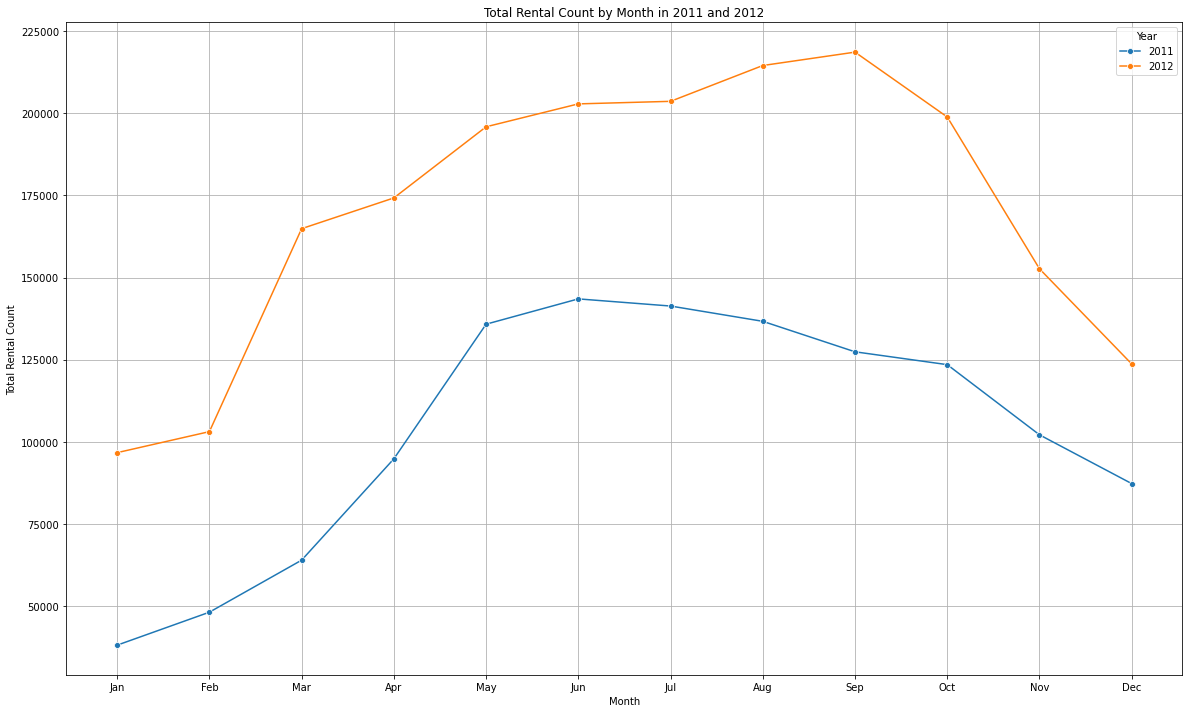

In [35]:
totalRentMonth = data['bikeDay'].groupby(['year','month']).agg({
    'total':'sum'
}).reset_index()

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
totalRentMonth["month"] = pd.Categorical(totalRentMonth["month"], categories=month_order, ordered=True)

# Plotting
plt.figure(figsize=(20, 12))
sns.lineplot(data=totalRentMonth, x="month", y="total", hue="year", marker="o")
plt.title('Total Rental Count by Month in 2011 and 2012')
plt.xlabel('Month')
plt.ylabel('Total Rental Count')
plt.legend(title='Year')
plt.grid(True)
plt.show()

### Question 1: What are the peak rental hours in period during weekdays and weekends?

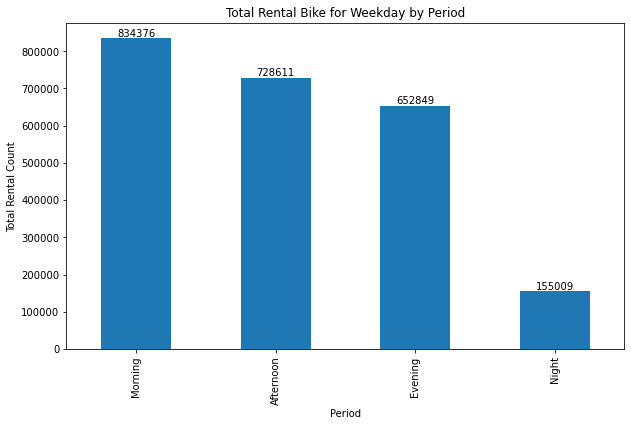

In [36]:
totalRentPeriodWeekday_sum = totalRentWeekday[('total', 'sum')]
totalRentPeriodWeekday_sum = totalRentPeriodWeekday_sum.sort_values(ascending=False)
# Plotting
plt.figure(figsize=(10, 6))
totalRentPeriodWeekday_sum.plot(kind='bar')
plt.title('Total Rental Bike for Weekday by Period')
plt.xlabel('Period')
plt.ylabel('Total Rental Count')
for i, value in enumerate(totalRentPeriodWeekday_sum):
    plt.text(i, value, str(int(value)), ha='center', va='bottom')
plt.show()

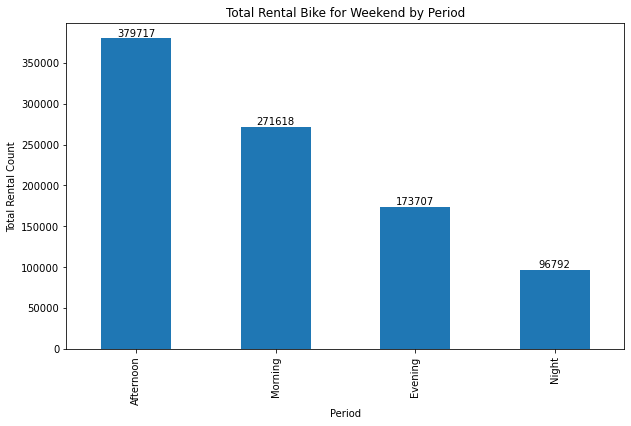

In [37]:
totalRentPeriodWeekend_sum = totalRentWeekend[('total', 'sum')]
totalRentPeriodWeekend_sum = totalRentPeriodWeekend_sum.sort_values(ascending=False)
# Plotting
plt.figure(figsize=(10, 6))
totalRentPeriodWeekend_sum.plot(kind='bar')
plt.title('Total Rental Bike for Weekend by Period')
plt.xlabel('Period')
plt.ylabel('Total Rental Count')
for i, value in enumerate(totalRentPeriodWeekend_sum):
    plt.text(i, value, str(int(value)), ha='center', va='bottom')
plt.show()

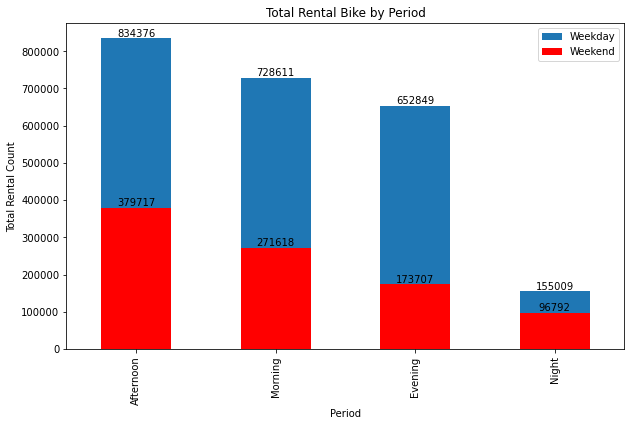

In [38]:
# Plotting total rental bike for weekday by period
totalRentPeriodWeekday_sum = totalRentWeekday[('total', 'sum')].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
totalRentPeriodWeekday_sum.plot(kind='bar', label='Weekday')
plt.title('Total Rental Bike by Period')
plt.xlabel('Period')
plt.ylabel('Total Rental Count')
for i, value in enumerate(totalRentPeriodWeekday_sum):
    plt.text(i, value, str(int(value)), ha='center', va='bottom')

# Plotting total rental bike for weekend by period on the same plot
totalRentPeriodWeekend_sum = totalRentWeekend[('total', 'sum')].sort_values(ascending=False)
totalRentPeriodWeekend_sum.plot(kind='bar', color='red', alpha=1, label='Weekend')
for i, value in enumerate(totalRentPeriodWeekend_sum):
    plt.text(i, value, str(int(value)), ha='center', va='bottom')

# Adding labels, legend, and displaying the plot
plt.title('Total Rental Bike by Period')
plt.xlabel('Period')
plt.ylabel('Total Rental Count')
plt.legend()
plt.show()

Based on the figure **"Total Rental Bike for Weekday by Period,"** the **highest** total bike rentals occur during the **"Morning"** period (5 AM - 12 PM) with a total of 834,376 rentals. Additionally, the figure shows that the **lowest** total bike rentals occur during the **"Night"** period (10 PM - 4 AM), with a total of 155,009 rentals.

Meanwhile, according to the figure **"Total Rental Bike for Weekend by Period,"** the **highest** total bike rentals occur during the **"Afternoon"** period (1 AM - 5 PM), with a total of 379,717 rentals. However, similar to the figure "Total Rental Bike for Weekday by Period," the lowest total bike rentals occur during the **"Night"** period (10 PM - 4 AM) with a total of 96,792 rentals.

**Question 1**: What are the peak rental hours in period during weekdays and weekends? <br>
**Answer**: the peak rental hours in period during **Weekday** is in the **Morning** (5AM - 12PM) and for **Weekend** is  in the **Afternoon** (1PM - 5PM)

### Question 2: How does weather condition affect bike rental demand?

C:\Users\felli\AppData\Local\Temp\ipykernel_10740\2679833641.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_counts = bikeDay.groupby('weathersit')['total'].mean()
C:\Users\felli\AppData\Local\Temp\ipykernel_10740\2679833641.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  weatherEffect = sns.barplot(x=weather_counts.index, y=weather_counts.values, palette="rocket")


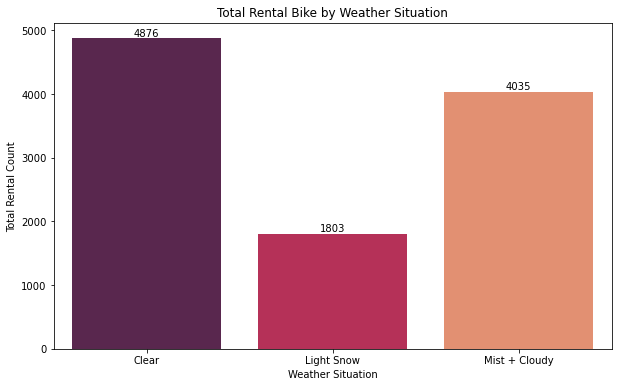

In [39]:
# Group the data by 'weathersit' and calculate the mean of counts for each weather situation
weather_counts = bikeDay.groupby('weathersit')['total'].mean()

plt.figure(figsize=(10, 6))
weatherEffect = sns.barplot(x=weather_counts.index, y=weather_counts.values, palette="rocket")

# Add labels to the bars
for bar in weatherEffect.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, int(height),
             ha='center', va='bottom')

plt.title('Total Rental Bike by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rental Count')
plt.show()

Weather condition significantly impacts bike rental demand. Clear weather, with a mean rental count of 4876, generally results in the highest demand for bike rentals. On the other hand, light snow, with a mean rental count of 1803, indicates much lower demand, likely due to adverse weather conditions affecting outdoor activities. Misty or cloudy weather, with a mean rental count of 4035, falls between clear weather and light snow in terms of demand, suggesting that while not ideal, these weather conditions still allow for considerable bike rental activity. Overall, these mean rental counts reflect the varying degrees of influence that different weather conditions exert on bike rental demand, with clear weather being the most favorable and light snow being the least favorable.

**Question 2**: How does weather condition affect bike rental demand? <br>
**Answer**: Weather condition significantly affects bike rental demand, with **clear weather** resulting in the **highest demand**, **misty or cloudy weather** falling **in between**, and **light snow** indicating the **lowest demand** due to adverse conditions.

### Question 3: What are the seasonal trends in bike rental demand?

C:\Users\felli\AppData\Local\Temp\ipykernel_10740\1700406381.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_trends = bikeDay.groupby('season')['total'].mean()
C:\Users\felli\AppData\Local\Temp\ipykernel_10740\1700406381.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seasonal_trends = sns.barplot(x=seasonal_trends.index, y=seasonal_trends.values, palette="muted")


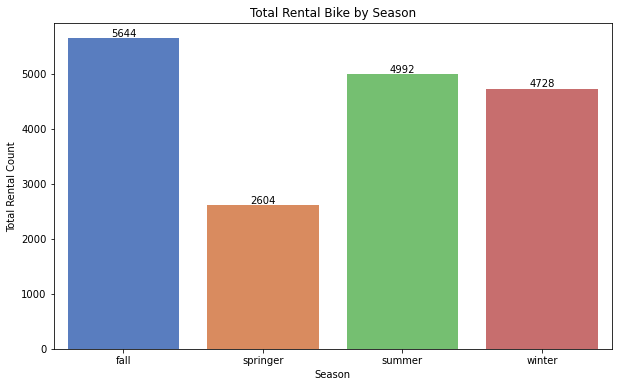

In [40]:
seasonal_trends = bikeDay.groupby('season')['total'].mean()

plt.figure(figsize=(10, 6))
seasonal_trends = sns.barplot(x=seasonal_trends.index, y=seasonal_trends.values, palette="muted")

# Add labels to the bars
for bar in seasonal_trends.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, int(height),
             ha='center', va='bottom')

plt.title('Total Rental Bike by Season')
plt.xlabel('Season')
plt.ylabel('Total Rental Count')
plt.show()

Based on the visualization "Total Rental Bike by Season Situation," the highest average bike rentals occur during fall season, with 5644 rentals, while the lowest average occurs during spring season, with only 2604 rentals.

**Question 3**: What are the seasonal trends in bike rental demand? <br>
**Answer**: The **highest** average bike rentals occur during **Fall season** and the **lowest** occur during **Spring season**

### Question 4: What is the correlation between weather conditions (temperature, humidity, and windspeed) and the count of rental bikes?

               temp       hum  windspeed     total
temp       1.000000  0.126963  -0.157944  0.627494
hum        0.126963  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.248489   1.000000 -0.234545
total      0.627494 -0.100659  -0.234545  1.000000


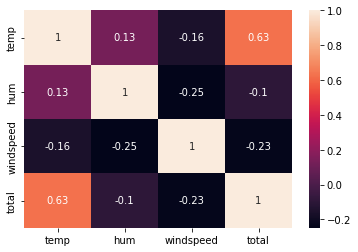

In [41]:
correlation = bikeDay[['temp','hum','windspeed','total']]
correlation = correlation.corr()
sns.heatmap(correlation, annot=True)
print(correlation)
plt.show()

The correlation coefficients between weather conditions (temperature, humidity, and windspeed) and the count of rental bikes are as follows:

- Temperature (temp) and rental bike count (total): 0.627494 (positive correlation)
- Humidity (hum) and rental bike count (total): -0.100659 (negative correlation)
- Windspeed (windspeed) and rental bike count (total): -0.234545 (negative correlation)

**Question 4**: What is the correlation between weather conditions (temperature, humidity, and windspeed) and the count of rental bikes? <br>
**Answer**:
- Temperature has a **moderate positive correlation** with the total of rental bikes, suggesting that **higher temperatures are associated with higher bike rental counts**.
- Humidity has a **weak negative correlation** with the total of rental bikes, implying that **higher humidity levels are associated with slightly lower bike rental counts**.
- Windspeed has a **weak negative correlation** with the total of rental bikes, indicating that **higher windspeeds are associated with slightly lower bike rental counts**.

## Conclusion

- The peak rental hours in period during Weekday is in the Morning (5AM - 12PM) and for Weekend is in the Afternoon (1PM - 5PM)
- Weather condition significantly affects bike rental demand, with clear weather resulting in the highest demand, misty or cloudy weather falling in between, and light snow indicating the lowest demand due to adverse conditions.
- The highest average bike rentals occur during Fall weather and the lowest occur during Spring weather
- higher temperatures are associated with higher bike rental counts, higher humidity levels are associated with slightly lower bike rental counts, and higher windspeeds are associated with slightly lower bike rental counts.

### Time series prediction: Moving Averages

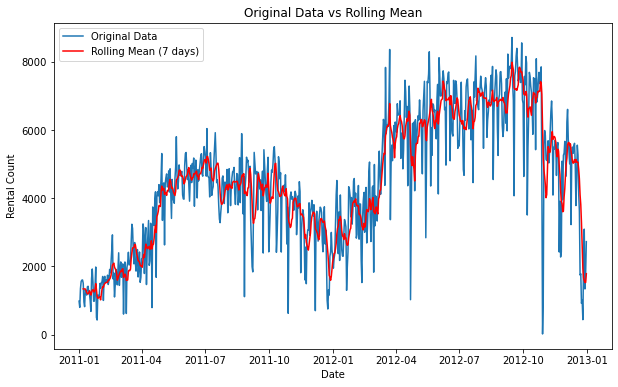

In [42]:
# Calculate rolling mean (moving averages) of 'total' (rental count) over a window of 7 days
rolling_mean = bikeDay['total'].rolling(window=7).mean()

# Plot original data and rolling mean
plt.figure(figsize=(10, 6))
plt.plot(bikeDay['total'], label='Original Data')
plt.plot(rolling_mean, color='red', label='Rolling Mean (7 days)')
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('Original Data vs Rolling Mean')
plt.legend()
plt.show()

In [43]:
rolling_mean.tail()

dteday
2012-12-27    1663.857143
2012-12-28    1588.428571
2012-12-29    1530.142857
2012-12-30    1531.428571
2012-12-31    1789.857143
Name: total, dtype: float64

The analysis above is an example of an advanced analytical technique using moving averages, known as rolling mean or also known as moving average. This technique is used to smooth data and identify short-term or long-term trends in a time series. By using rolling mean, daily fluctuations in total bike rental data have been smoothed, allowing for a clearer view of short-term trends. In this case, it can be seen that on December 31, 2012, there was a significant increase in total bike rentals based on the higher rolling mean value compared to the rolling mean values on previous dates. This could indicate an increase in bike rental activity towards the end of the year.

In [44]:
with pd.ExcelWriter('bikeRental.xlsx') as writer:
    bikeDay.to_excel(writer, sheet_name='day', index=True)  # Write bikeDay to Sheet1 (day)
    bikeHour.to_excel(writer, sheet_name='period', index=True) #Write bikeHour to Sheet2 (period)